In [233]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates
%matplotlib inline 

In [137]:
spotify_df = pd.read_csv('../data/data.csv', infer_datetime_format=True, parse_dates=['Date'], index_col='Date')

In [138]:
spotify_df.head()

,Position,Track Name,Artist,Streams,URL,Region
Date,,,,,,
2017-01-01,1,Chantaje,Shakira,253019,https://open.spotify.com/track/6mICuAdrwEjh6Y6...,ar
2017-01-01,2,Vente Pa' Ca,Ricky Martin,223988,https://open.spotify.com/track/7DM4BPaS7uofFul...,ar
2017-01-01,3,Reggaetón Lento (Bailemos),CNCO,210943,https://open.spotify.com/track/3AEZUABDXNtecAO...,ar
2017-01-01,4,Safari,J Balvin,173865,https://open.spotify.com/track/6rQSrBHf7HlZjtc...,ar
2017-01-01,5,Shaky Shaky,Daddy Yankee,153956,https://open.spotify.com/track/58IL315gMSTD37D...,ar


In [139]:
spotify_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2017625 entries, 2017-01-01 to 2017-08-17
Data columns (total 6 columns):
Position      int64
Track Name    object
Artist        object
Streams       int64
URL           object
Region        object
dtypes: int64(2), object(4)
memory usage: 107.8+ MB


In [140]:
spotify_df.describe()

,Position,Streams
count,2.017625e+06,2.017625e+06
mean,9.394797e+01,5.208577e+04
std,5.735935e+01,2.095484e+05
min,1.000000e+00,1.001000e+03
25%,4.400000e+01,3.189000e+03
50%,9.100000e+01,8.674000e+03
75%,1.420000e+02,2.814300e+04
max,2.000000e+02,1.138152e+07


In [210]:
top_o_charts = spotify_df[spotify_df['Position'] == 1]
songs_that_topped = set((top_o_charts['Track Name'].tolist()))
print(songs_that_topped)
print(len(songs_that_topped))
region_charts = top_o_charts[['Region','Streams','Artist','Track Name']].reset_index()
print(len(region_charts))
region_charts.head()

{nan, 'New Rules', 'Sen Olsan Bari', 'De Snakker', 'Eikö Sua Hävetä', 'Despacito - Remix', 'Ked Af Det', 'Paradinha', "It Ain't Me (with Selena Gomez)", 'OK', 'Such A Boy', 'Feels', 'Salam', 'Versace On The Floor', 'Antaudun', 'Back to You (feat. Bebe Rexha & Digital Farm Animals)', 'Rahan takii', 'Bimbi', 'Paris', 'Α. Nwaar Is The New Black', 'Habiba', 'Thunder', 'Shape of You', 'Galway Girl', 'Fazer Falta', 'Amar pelos Dois', '4x Duurder', 'Yolla', 'Cuando Se Pone a Bailar', 'Hula Hula', 'Liikaa Sussa Kii', 'Heavy (feat. Kiiara)', 'Deu Onda', 'Castle on the Hill', '24K Magic', 'Millionär', 'Fy faen', 'Waiting For', 'Unforgettable', 'Escápate Conmigo', 'Chantaje', 'Senza Pagare VS T-Pain', 'Neinei', 'Helt seriöst', 'Time', 'Fullir Vasar', 'Hanuri (feat. Boyat)', "Occidentali's Karma - Radio Edit", 'Symphony (feat. Zara Larsson)', 'As I Lay Me Down', 'Olha a Explosão', 'Yhtäccii', 'Let Me Love You', 'Line', 'Helwa', 'Rica', 'Utro', 'Vai Embrazando', 'There for You', 'Lapioin', 'Jokaine

,Date,Region,Streams,Artist,Track Name
0,2017-01-01,ar,253019,Shakira,Chantaje
1,2017-01-02,ar,185399,Shakira,Chantaje
2,2017-01-03,ar,183132,Shakira,Chantaje
3,2017-01-04,ar,186926,Shakira,Chantaje
4,2017-01-05,ar,191288,Shakira,Chantaje


In [212]:
avg_streams = spotify_df.groupby(['Region','Date'])['Region','Streams'].mean().reset_index()
print(type(avg_streams))
print(avg_streams.head())
avg_streams.rename(columns={'Streams':'avg_streams'}, inplace=True)
print(len(avg_streams))
avg_streams.head()

<class 'pandas.core.frame.DataFrame'>
  Region       Date    Streams
0     ar 2017-01-01  39444.360
1     ar 2017-01-02  30050.205
2     ar 2017-01-03  29609.535
3     ar 2017-01-04  30097.865
4     ar 2017-01-05  31118.230
11854


,Region,Date,avg_streams
0,ar,2017-01-01,39444.360
1,ar,2017-01-02,30050.205
2,ar,2017-01-03,29609.535
3,ar,2017-01-04,30097.865
4,ar,2017-01-05,31118.230


In [219]:
streaming_data = region_charts.merge(avg_streams, on=('Date', 'Region'), how='left')
streaming_data.head()

,Date,Region,Streams,Artist,Track Name,avg_streams
0,2017-01-01,ar,253019,Shakira,Chantaje,39444.360
1,2017-01-02,ar,185399,Shakira,Chantaje,30050.205
2,2017-01-03,ar,183132,Shakira,Chantaje,29609.535
3,2017-01-04,ar,186926,Shakira,Chantaje,30097.865
4,2017-01-05,ar,191288,Shakira,Chantaje,31118.230


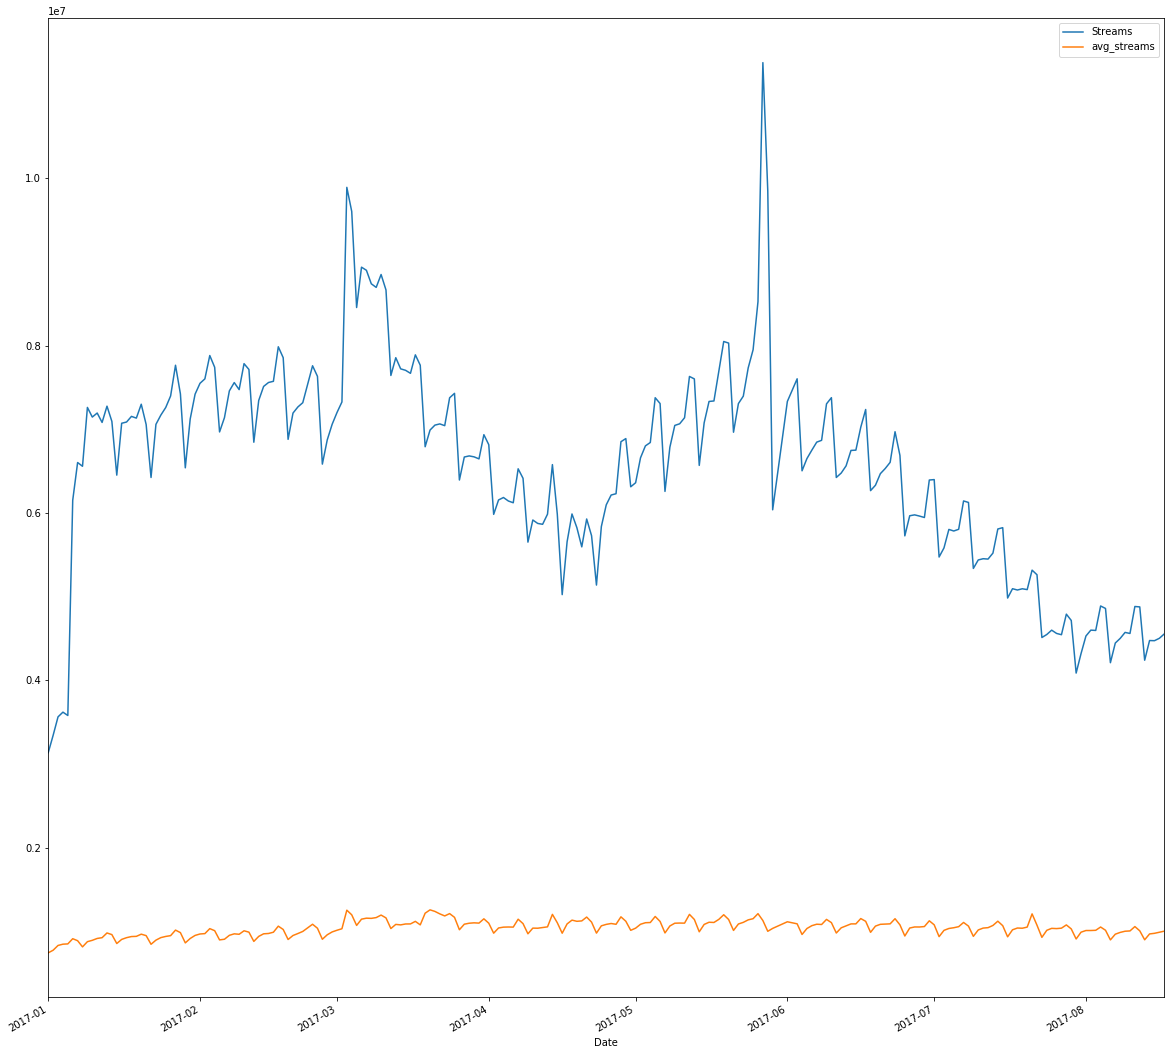

In [244]:
streaming_data[streaming_data['Region'] == 'global'].plot(kind='line',x='Date', y=['Streams', 'avg_streams'], figsize=(20,20))

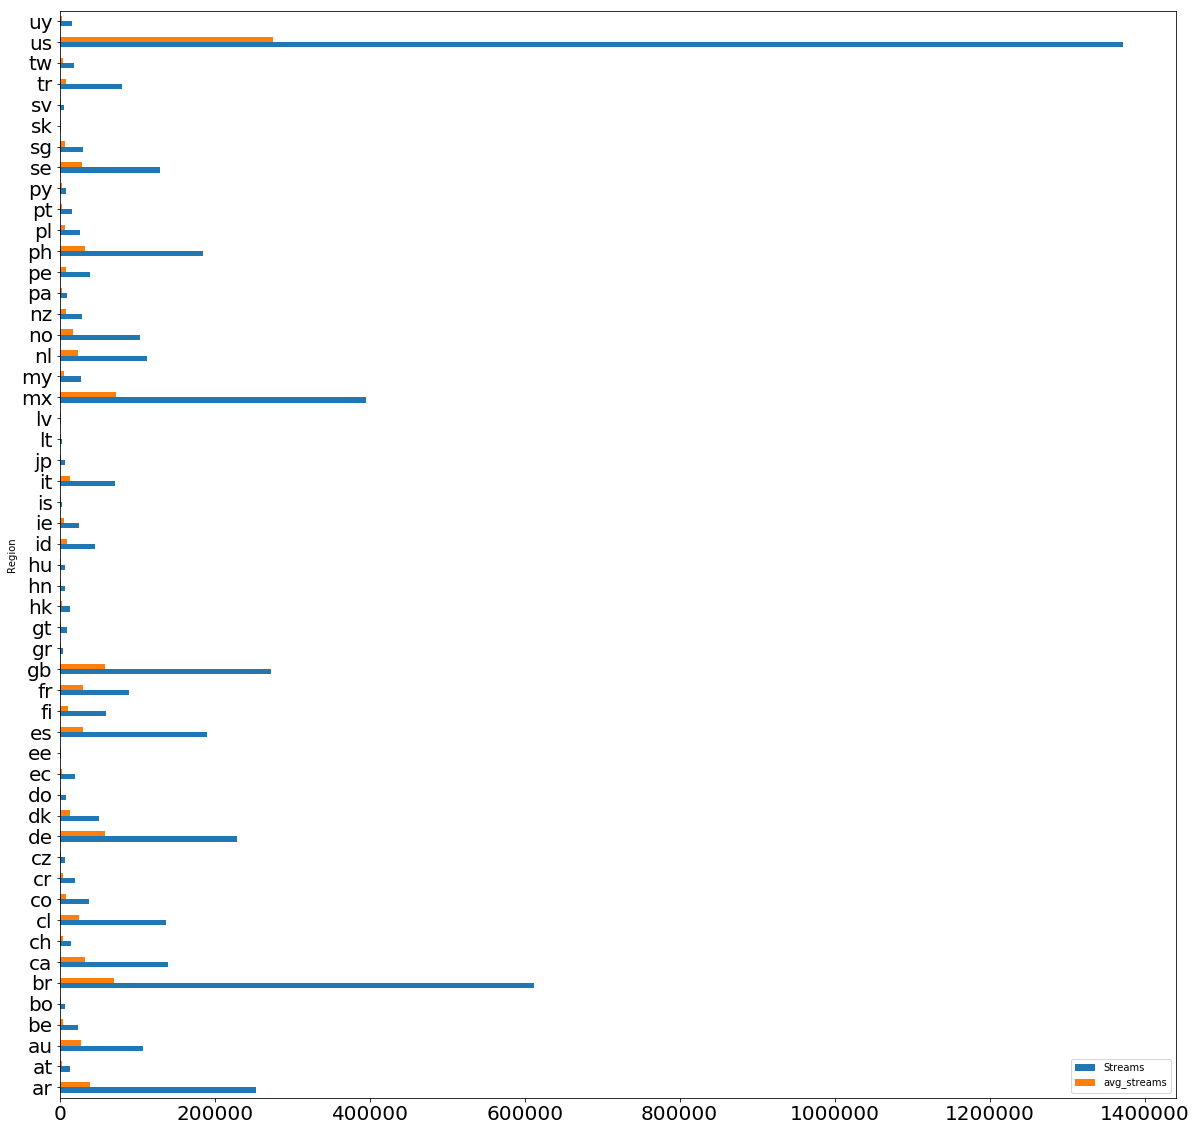

In [256]:
streaming_data_no_global = streaming_data[streaming_data['Region'] != 'global']
ax = streaming_data_no_global[streaming_data_no_global['Date'] == '2017-01-01'].plot.barh(x='Region', y=['Streams', 'avg_streams'], \
                                                            figsize=(20,20), fontsize=20)
streaming_data.to_json('/Users/gmgtex/Documents/My Tableau Repository/DataSources/spotify_streaming.json')